In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


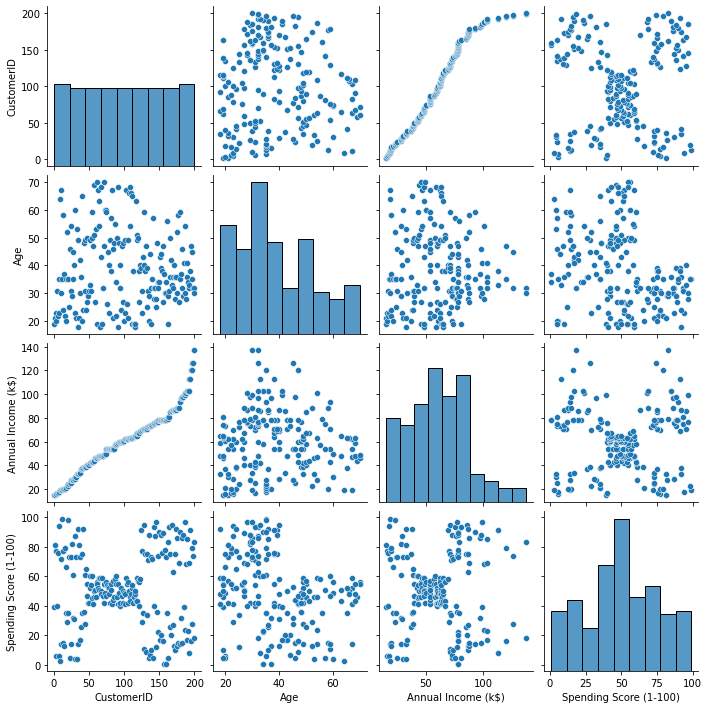

In [5]:
sns.pairplot(df)

In [24]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ykmeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [6]:
x = df.iloc[:, [3, 4]]

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Finding the best value of K

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[399.99999999999994,
 269.1425070447921,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.103778121150555,
 44.91118554999014,
 37.151357067931045,
 33.854106217363686,
 29.076176851244288]

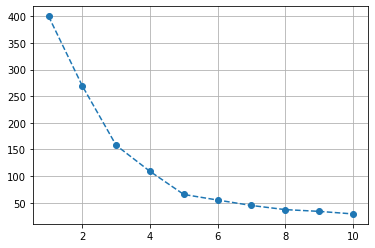

In [11]:
plt.plot(range(1,11), wcss, "o--")
plt.grid()
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=1)
ylabel = kmeans.fit_predict(x)

In [15]:
ylabel

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [14]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
df["ykmeans"] = ylabel

In [17]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ykmeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


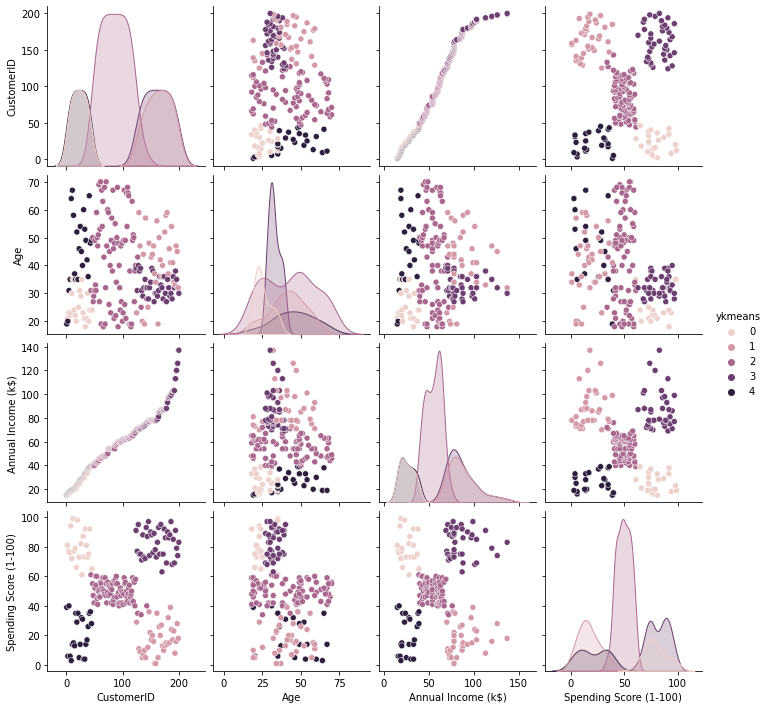

In [43]:
sns.pairplot(df, hue = 'ykmeans')

In [18]:
kmeans.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

In [19]:
df["ykmeans"].value_counts()

2    81
3    39
1    35
4    23
0    22
Name: ykmeans, dtype: int64

# Plotting the clusters

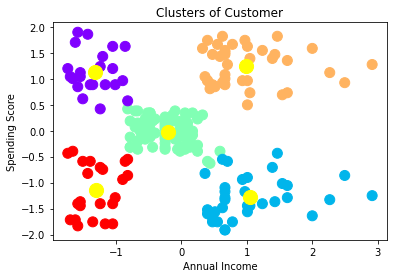

In [21]:
t.scatter(x[:, 0], x[:, 1], c=ylabel, s=100, cmap="rainbow")#Cluster plotting
#Centroids poltting
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="yellow", s=200)pl

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clusters of Customer")
plt.show()

In [26]:
df[df.ykmeans==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ykmeans
count,22.000000,22.000000,22.000000,22.000000,22.0
mean,23.090909,25.272727,25.727273,79.363636,0.0
std,13.147185,5.257030,7.566731,10.504174,0.0
min,2.000000,18.000000,15.000000,61.000000,0.0
25%,12.500000,21.250000,19.250000,73.000000,0.0
50%,23.000000,23.500000,24.500000,77.000000,0.0
75%,33.500000,29.750000,32.250000,85.750000,0.0
max,46.000000,35.000000,39.000000,99.000000,0.0


In [27]:
df[df.ykmeans==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ykmeans
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,164.371429,41.114286,88.200000,17.114286,1.0
std,21.457325,11.341676,16.399067,9.952154,0.0
min,125.000000,19.000000,70.000000,1.000000,1.0
25%,148.000000,34.000000,77.500000,10.000000,1.0
50%,165.000000,42.000000,85.000000,16.000000,1.0
75%,182.000000,47.500000,97.500000,23.500000,1.0
max,199.000000,59.000000,137.000000,39.000000,1.0


In [28]:
df.groupby("ykmeans")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Annual Income (k$),Spending Score (1-100)
ykmeans,,
0,25.727273,79.363636
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


# Classification

In [29]:
x = df.iloc[:, [3,4]]
y = df.iloc[:, -1]

In [30]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [31]:
y

0      4
1      0
2      4
3      0
4      4
      ..
195    3
196    1
197    3
198    1
199    3
Name: ykmeans, Length: 200, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [33]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    return model

In [34]:
from sklearn.metrics import classification_report

In [35]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [36]:
bnb = mymodel(BernoulliNB())

Training Accuracy : 0.42857142857142855
Testing Accuracy : 0.35


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        11
           2       0.35      1.00      0.52        21
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         9

    accuracy                           0.35        60
   macro avg       0.07      0.20      0.10        60
weighted avg       0.12      0.35      0.18        60



In [37]:
mnb = mymodel(MultinomialNB())

Training Accuracy : 0.6857142857142857
Testing Accuracy : 0.6166666666666667


              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.82      0.90        11
           2       0.53      0.86      0.65        21
           3       0.33      0.09      0.14        11
           4       0.20      0.11      0.14         9

    accuracy                           0.62        60
   macro avg       0.59      0.58      0.56        60
weighted avg       0.58      0.62      0.57        60



In [38]:
gnb = mymodel(GaussianNB())

Training Accuracy : 0.9785714285714285
Testing Accuracy : 0.9833333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [39]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.9928571428571429
Testing Accuracy : 0.95


              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.95        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.96      0.95      0.95        60



In [40]:
logreg = mymodel(LogisticRegression(multi_class="ovr"))

Training Accuracy : 0.9928571428571429
Testing Accuracy : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         9

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [41]:
ovr = mymodel(OneVsRestClassifier(LogisticRegression()))

Training Accuracy : 0.9928571428571429
Testing Accuracy : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         9

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

